![example](istockphoto-861198276-612x612.jpg)

# Final Phase One Project Submission

* Student name: Rose Wairimu Kimondo
* Student pace: Part Time

# Overview
A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Understanding
> Microsoft sees the allure of the film business and feels that they also need to get into the market. The decision involves the creation of a new movie studio.<br>
>    
> However, there is a limitation surrounding information with little awareness of what to do, how to enter the market, what movies to make, when to make them, which studios to emulate, how much money to invest, and a lot of other crucial matters that need understanding before any other steps can be taken.<br>
>
>> The task at hand is to explore the types of films that are doing well at tbhe Box Office and translate these findings into useful insights to help Microsoft decide on the way forward.<br>

The topics informing the questions for this analysis are:
* Genre
* Release month
* Production budget

***
Data Questions:
1. a. Which studios make the highest grossing films?<br>
   b. What are the genres of the highest grossing films that are made by these studios?<br>
     
2. a.  How does spending on production translate to Gross Earnings? Does higher spending lead to higher earnings?<br>    
     b. What is the relationship between the production budget and the gross earnings?<br>
     c. Which genre has the highest return on Investment?<br>

3. When should the films be released? Which release months make the most money?<br>

***

# Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

# Data Importation & Preparation

**1. Unzipping Data Files Using Patool Library**

In [315]:
# Import standard packages
import pandas as pd
import numpy as np
import os
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [316]:
# Open up a connection
conn = sqlite3.connect('data/im.db')


In [317]:
# Viewing the list of tables in the IMDB Database 
table_name_query = """SELECT *
                      FROM sqlite_master;
"""

pd.read_sql(table_name_query, conn).head()

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."


In [318]:
# Viewing the tables in the df
imdb_tables = pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)
imdb_tables

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [319]:
#Viewing the columns in the movie basics table
movie_basics = """SELECT * FROM movie_basics;""" 

pd.read_sql(movie_basics, conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [320]:
# Read the Box Office Mojo Table Data
# The table seems to contain useful information for domestic and gross earnings and the studios
bom_movie_info = pd.read_csv('data/bom.movie_gross.csv')
bom_movie_info.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [321]:
bom_movie_info.shape

(3387, 5)

In [322]:
# Finding the number of unique studios. There are 258
len(bom_movie_info['studio'].unique())

258

In [323]:
# Exploring the year ranges for the data. 
# It starts from 2020 to 2018
bom_movie_info['year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

In [324]:
# Read The Numbers Table Data, which provides perfect data for comparing 
# production budget and gross earnings
# We will call it the budget&earnings table
budget_and_earnings = pd.read_csv('data/tn.movie_budgets.csv')
budget_and_earnings.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [325]:
# Exploring the budget and earnings df
budget_and_earnings['release_date'].unique

<bound method Series.unique of 0       Dec 18, 2009
1       May 20, 2011
2        Jun 7, 2019
3        May 1, 2015
4       Dec 15, 2017
            ...     
5777    Dec 31, 2018
5778     Apr 2, 1999
5779    Jul 13, 2005
5780    Sep 29, 2015
5781     Aug 5, 2005
Name: release_date, Length: 5782, dtype: object>

In [326]:
# Exploring the budget and earnings df
budget_and_earnings.shape

(5782, 6)

# Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

# Question 1: What are the qualities of the highest grossing films?
## Which studios are producing the highest domestic grossing films?

**Clean/prepare the table (We will use the BOM table(bom_movie_info) since it contains details for studios which can be compared with the gross earnings)**
* Get rid of null values
* Get rid of duplicates

*Because we are just starting the movie production business, we will focus on domestic gross*

In [327]:
# Check for null values in the domestic_gross column
null_domestic_gross_values = bom_movie_info['domestic_gross'].isna().sum()/len(bom_movie_info['domestic_gross'])*100
print("The percentage of null domestic gross values is:", null_domestic_gross_values, "% which is insignificant.")

The percentage of null domestic gross values is: 0.8266902863891349 % which is insignificant.


In [328]:
# This is only 0.8% of the values, which is a low number. 
# Let us take a look at the data and see whether we will be dropping titles that 
# will affect the domestic gross function
bom_movie_info.loc[bom_movie_info['domestic_gross'].isna() == True]
# From the results, most of these are foreign titles and they are not too many, and we can drop them

,title,studio,domestic_gross,foreign_gross,year
230,It's a Wonderful Afterlife,UTV,NaN,1300000,2010
298,Celine: Through the Eyes of the World,Sony,NaN,119000,2010
302,White Lion,Scre.,NaN,99600,2010
306,Badmaash Company,Yash,NaN,64400,2010
327,Aashayein (Wishes),Relbig.,NaN,3800,2010
537,Force,FoxS,NaN,4800000,2011
713,Empire of Silver,NeoC,NaN,19000,2011
871,Solomon Kane,RTWC,NaN,19600000,2012
928,The Tall Man,Imag.,NaN,5200000,2012
933,Keith Lemon: The Film,NaN,NaN,4000000,2012


In [329]:
# Check for null values in the studio column
# We can drop all of these since thy are only five, which is equal to 
bom_movie_info.loc[bom_movie_info['studio'].isna() == True]
null_studio_values = bom_movie_info['studio'].isna().sum()/len(bom_movie_info['studio'])*100
print("The percentage of null studio values is:", null_studio_values, "% which is insignificant.")


The percentage of null studio values is: 0.14762326542663123 % which is insignificant.


In [330]:
# Drop nulls
bom_gross = bom_movie_info.dropna(subset = ['domestic_gross', 'studio'])

In [331]:
# Check for nulls in DF
bom_gross.isna().sum()

title                0
studio               0
domestic_gross       0
foreign_gross     1349
year                 0
dtype: int64

In [332]:
# Look at nulls in the foreign gross column since there are a lot of them
bom_gross.loc[bom_gross['foreign_gross'].isna() == True]
null_foreign_gross = bom_movie_info['foreign_gross'].isna().sum()/len(bom_movie_info['foreign_gross'])*100
print("The percentage of null foreign gross values is:", null_foreign_gross, "% which is insignificant.")

# 40% is very large, and further affirms our decision to only use the domestic gross value
# We can drop the foreign gross column

The percentage of null foreign gross values is: 39.85828166519043 % which is insignificant.


In [333]:
bom_gross = bom_gross.drop(columns = 'foreign_gross')

In [334]:
# Check again for nulls. There are now no nulls
bom_gross.isna().sum()

title             0
studio            0
domestic_gross    0
year              0
dtype: int64

In [335]:
# Checking for duplicates
duplicates = bom_gross[bom_gross.duplicated()]
print(len(duplicates))

# There are no duplicates

0


In [336]:
# Checking for placeholder values (maybe a negative value)
# Even though values like 1100000 come up many times, 
# it is likely valid since many of these values are estimated and rounded off
bom_gross['domestic_gross'].value_counts()

1100000.0      32
1000000.0      30
1300000.0      30
1200000.0      25
1400000.0      23
               ..
68800.0         1
87000000.0      1
739000.0        1
336000000.0     1
727000.0        1
Name: domestic_gross, Length: 1794, dtype: int64

In [337]:
# Making sure years are within our desired range
# This is still 2010 to 2018
bom_gross['year'].value_counts()

2015    449
2016    433
2011    396
2012    393
2014    390
2013    345
2010    322
2017    320
2018    308
Name: year, dtype: int64

**Visualizing**

In [338]:
sns.set_style('darkgrid')

In [339]:
# Group the data by studio and display the total that each studio made
bom_studios = bom_gross.groupby('studio')['domestic_gross'].sum().sort_values(ascending = False)
bom_studios.head()

studio
BV      1.841903e+10
Uni.    1.290239e+10
WB      1.216805e+10
Fox     1.094950e+10
Sony    8.459683e+09
Name: domestic_gross, dtype: float64

Text(0, 0.5, 'Total Domestic Gross')

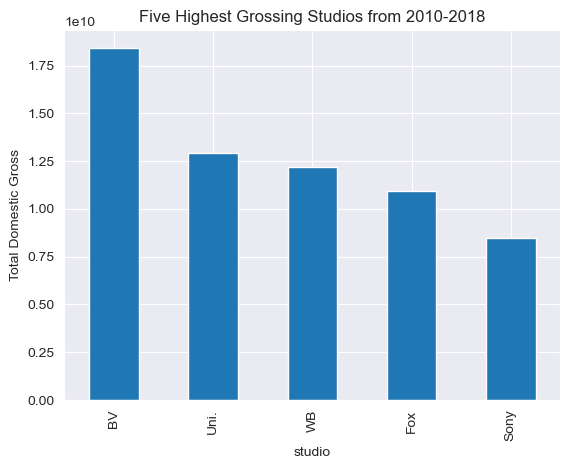

In [340]:
# Create the plot showing the Five highest grossing studios, representing the best performing
studios_plt = bom_studios.head().plot(kind = 'bar')
plt.title('Five Highest Grossing Studios from 2010-2018')
plt.ylabel('Total Domestic Gross')

## Further Evaluation: What are the genres of these highest grossing films that the studios are making?

**We can sort the films based on domestic gross and determine the top 10 films per studio for the five leading studios**

*Please remember that these are films from 2010 to 2018*

In [341]:
# Sort films by highest domestic gross
sorted_gross = bom_gross.sort_values(ascending = False, by = 'domestic_gross')

#### 1. Buena Vista (BV)

In [342]:
# Create DF with just the highest grossing films for BV
top_BV = sorted_gross.loc[sorted_gross['studio'] == 'BV']
top_BV.head(10)

,title,studio,domestic_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,2015
3080,Black Panther,BV,700100000.0,2018
3079,Avengers: Infinity War,BV,678800000.0,2018
727,Marvel's The Avengers,BV,623400000.0,2012
2758,Star Wars: The Last Jedi,BV,620200000.0,2017
3082,Incredibles 2,BV,608600000.0,2018
2323,Rogue One: A Star Wars Story,BV,532200000.0,2016
2759,Beauty and the Beast (2017),BV,504000000.0,2017
2324,Finding Dory,BV,486300000.0,2016
1875,Avengers: Age of Ultron,BV,459000000.0,2015


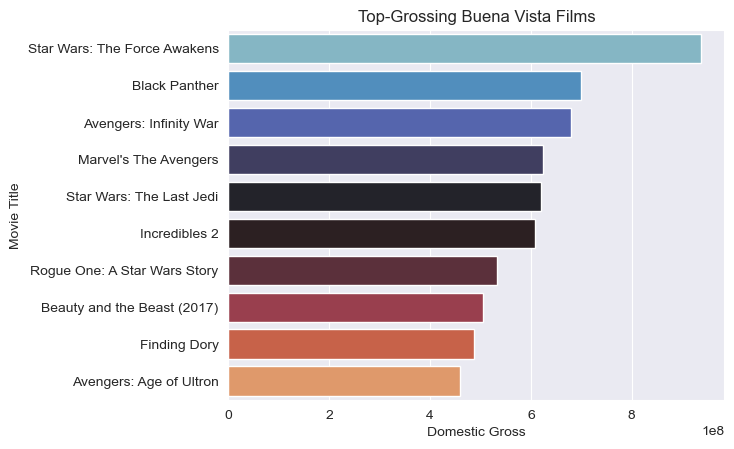

In [343]:
# Plot the top grossing films for BV
BV_plot = sns.barplot(data = top_BV.head(10),
                      x = 'domestic_gross',
                      y = 'title',
                     palette = 'icefire')

BV_plot.set_title('Top-Grossing Buena Vista Films')
BV_plot.set_ylabel('Movie Title')
BV_plot.set_xlabel('Domestic Gross')
BV_plot;

#### 2. Universal

In [344]:
# Create DF with just the highest grossing films for Universal
top_Uni = sorted_gross.loc[sorted_gross['studio'] == 'Uni.']
top_Uni.head(10)

,title,studio,domestic_gross,year
1873,Jurassic World,Uni.,652300000.0,2015
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,2018
2327,The Secret Life of Pets,Uni.,368400000.0,2016
1129,Despicable Me 2,Uni.,368100000.0,2013
1874,Furious 7,Uni.,353000000.0,2015
1876,Minions,Uni.,336000000.0,2015
3096,Dr. Seuss' The Grinch (2018),Uni.,270600000.0,2018
2334,Sing,Uni.,270400000.0,2016
2761,Despicable Me 3,Uni.,264600000.0,2017
8,Despicable Me,Uni.,251500000.0,2010


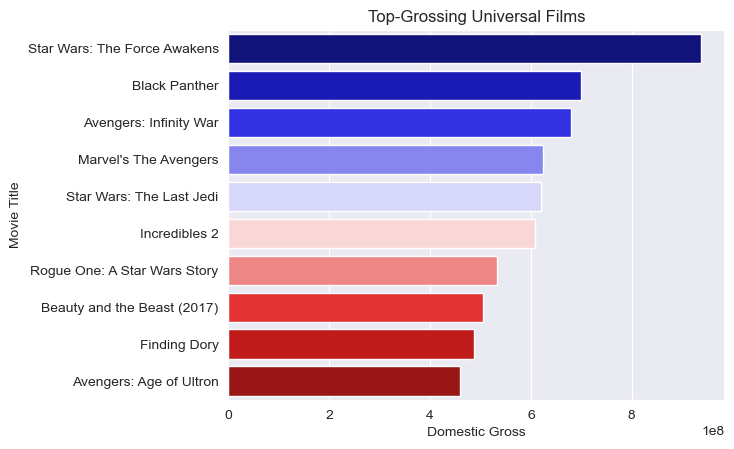

In [345]:
# Plot the top grossing films for Universal
Uni_plot = sns.barplot(data = top_BV.head(10),
                      x = 'domestic_gross',
                      y = 'title',
                     palette = 'seismic')

Uni_plot.set_title('Top-Grossing Universal Films')
Uni_plot.set_ylabel('Movie Title')
Uni_plot.set_xlabel('Domestic Gross')
Uni_plot;

#### 3. Warner Bros

In [346]:
# Create DF with just the highest grossing films for Warner Bros
top_WB = sorted_gross.loc[sorted_gross['studio'] == 'WB']
top_WB.head(10)

,title,studio,domestic_gross,year
729,The Dark Knight Rises,WB,448100000.0,2012
2767,Wonder Woman,WB,412600000.0,2017
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,2011
1489,American Sniper,WB,350100000.0,2014
3083,Aquaman,WB,335100000.0,2018
2328,Batman v Superman: Dawn of Justice,WB,330400000.0,2016
2331,Suicide Squad,WB,325100000.0,2016
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
1135,Man of Steel,WB,291000000.0,2013


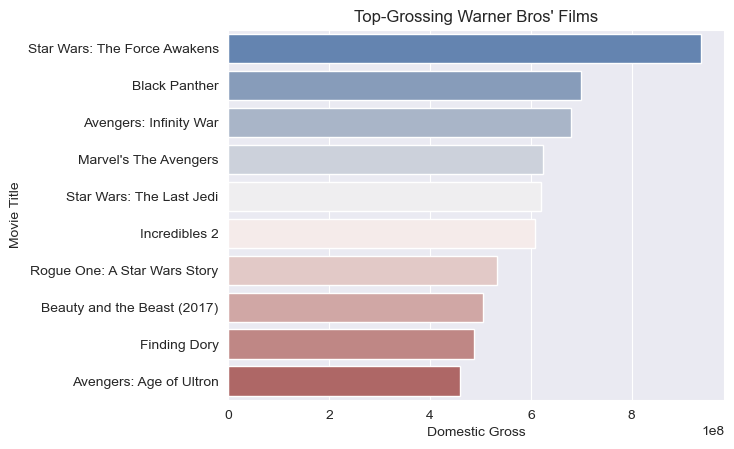

In [347]:
# Plot the top grossing films for Warner Bros
WB_plot = sns.barplot(data = top_BV.head(10),
                      x = 'domestic_gross',
                      y = 'title',
                     palette = 'vlag')

WB_plot.set_title("Top-Grossing Warner Bros' Films")
WB_plot.set_ylabel('Movie Title')
WB_plot.set_xlabel('Domestic Gross')
WB_plot;

#### 4. Fox

In [348]:
# Create DF with just the highest grossing films for Fox
top_Fox = sorted_gross.loc[sorted_gross['studio'] == 'Fox']
top_Fox.head(10)

,title,studio,domestic_gross,year
2330,Deadpool,Fox,363100000.0,2016
3087,Deadpool 2,Fox,318500000.0,2018
1482,X-Men: Days of Future Past,Fox,233900000.0,2014
1881,The Martian,Fox,228400000.0,2015
2772,Logan (2017),Fox,226300000.0,2017
3084,Bohemian Rhapsody,Fox,216400000.0,2018
1484,Dawn of the Planet of the Apes,Fox,208500000.0,2014
1137,The Croods,Fox,187200000.0,2013
1884,The Revenant,Fox,183600000.0,2015
1890,Home (2015),Fox,177400000.0,2015


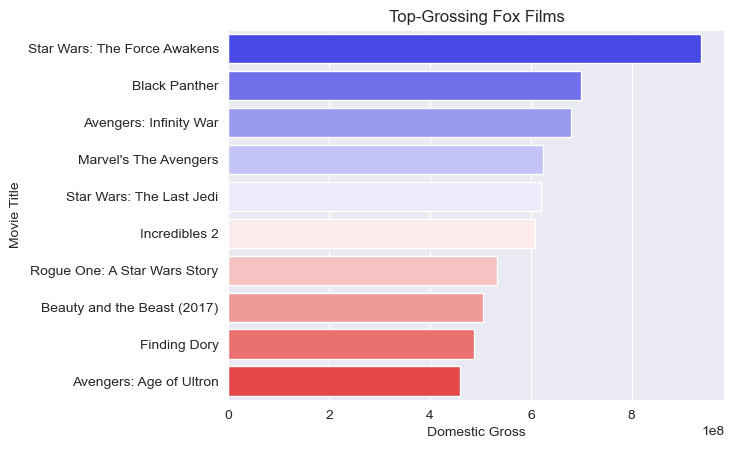

In [349]:
# Plot the top grossing films for BV
Fox_plot = sns.barplot(data = top_BV.head(10),
                      x = 'domestic_gross',
                      y = 'title',
                     palette = 'bwr')

Fox_plot.set_title('Top-Grossing Fox Films')
Fox_plot.set_ylabel('Movie Title')
Fox_plot.set_xlabel('Domestic Gross')
Fox_plot;

#### 5. Sony

In [350]:
# Create DF with just the highest grossing films for Sony
top_Sony = sorted_gross.loc[sorted_gross['studio'] == 'Sony']
top_Sony.head(10)

,title,studio,domestic_gross,year
2762,Jumanji: Welcome to the Jungle,Sony,404500000.0,2017
2763,Spider-Man: Homecoming,Sony,334200000.0,2017
728,Skyfall,Sony,304400000.0,2012
733,The Amazing Spider-Man,Sony,262000000.0,2012
3085,Venom (2018),Sony,213500000.0,2018
1485,The Amazing Spider-Man 2,Sony,202900000.0,2014
1877,Spectre,Sony,200100000.0,2015
1502,22 Jump Street,Sony,191700000.0,2014
3102,Spider-Man: Into The Spider-Verse,Sony,190200000.0,2018
736,MIB 3,Sony,179000000.0,2012


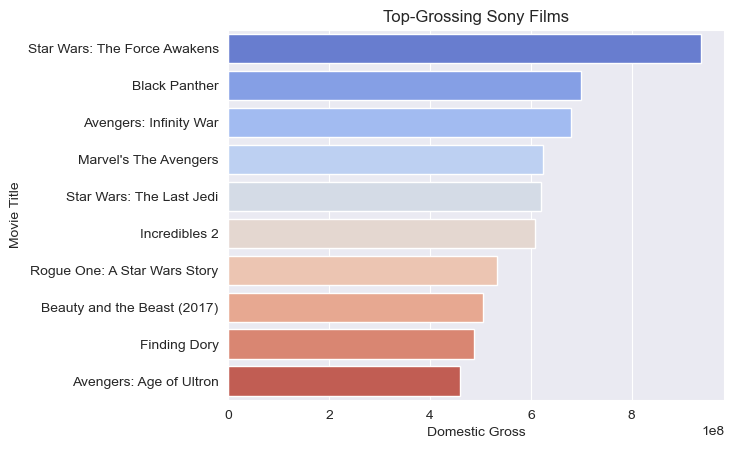

In [351]:
# Plot the top grossing films for BV
Sony_plot = sns.barplot(data = top_BV.head(10),
                      x = 'domestic_gross',
                      y = 'title',
                     palette = 'coolwarm')

Sony_plot.set_title('Top-Grossing Sony Films')
Sony_plot.set_ylabel('Movie Title')
Sony_plot.set_xlabel('Domestic Gross')
Sony_plot;

# Question 1 Conclusion
**What are the qualities of the top-grossing films from 2010 to 2018?**

To conclude, we looked at the bom_movie_gross dataset from Box Office Mojo.<br>

The top-grossing films were defined as those with the highest gross earnings.<br>

Domestic gross was chosen over foreign gross because as a movie studio, it is important to conquer the home market before venturing into foreign markets.<br>

The top five studios with the top grossing films are:<br>
* Buena Vista (BV) | total domestic gross: $18.4 billion

* Universal Studios (Uni.) | total domestic gross: $12.9 billion

* Warner Bros. (WB) | total domestic gross: $12.1 billion

* 20th Century Fox (Fox) | total domestic gross: $1.1 billion

* Sony | total domestic gross: $8.4 billion

We then further investigated the top grossing studios by looking at the top 10 films for each of the studios.<br>

The plots referenced above are <BV_plot, Uni_plot, WB_plot, Fox_plot, and Sony_plot>

>We can easily see a pattern in the qualities and genres of these films.<br>

>>Most of them are action films. 
>>>They are superhero films (e.g. Avengers, Deadpool, The Dark Knight, etc), sci-fi/fantasy franchises (e.g. Star Wars, Jurassic World, Harry Potter, Dawn of the Planet of the Apes, etc), and animated films for kids & families (e.g. Incredibles, Despicable Me, etc).<br>


**RECOMMENDATIONS**
Based on these findings, the recommendation is to make films that have these qualities (animated, superhero, scifi, fantasy).<br>

Investing in the scifi/fantasy and superhero franchises seems to be a good idea as we can see a positive trend for these films from 2010 - 2018.<br>

It can also be concluded that benchmarking these five studios (Buena Vista, Universal, Warner Bros, Fox, and Sony) will be an excellent idea for identifying their best practices to emulate them<br>


# Question 2. How does spending on production translate to Gross Earnings? Does higher spending lead to higher earnings?
## What is the relationship between the production budget and the gross earnings?
**Clean and prepare the table**
* Check for null values
* Check for duplicates
* Change the datatypes as required
* Limit the table to a reasonable year range

In [352]:
# Looking for duplicates in the table
# Check for duplicates
# There are no dublicates
mb_duplicates = budget_and_earnings[budget_and_earnings.duplicated()]
print(len(mb_duplicates))

0


In [353]:
# Looking for null values. There are no null values
budget_and_earnings.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [354]:
# Confirming the data types of the production and gross columns since we want numbers
budget_and_earnings.dtypes
# These are currently not integers and will have to be converted

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [355]:
# It has been noted that the release date is an object and we will use it later
# Therefore, convert it to a datetime object
budget_and_earnings['release_date'] = pd.to_datetime(budget_and_earnings['release_date'])
budget_and_earnings.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [356]:
# Change production budget to an integrer
budget_and_earnings['production_budget'] = budget_and_earnings['production_budget'].str.replace('$', '').str.replace(',', '').astype(int)

In [357]:
# Change domestic gross to an integer
budget_and_earnings['domestic_gross'] = budget_and_earnings['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(int)

In [358]:
# Change Worldwide Gross to an integer
budget_and_earnings['worldwide_gross'] = budget_and_earnings['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype('float')
budget_and_earnings.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2.776345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09
2,3,2019-06-07,Dark Phoenix,350000000,42762350,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1.403014e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1.316722e+09


In [359]:
budget_and_earnings.dtypes

id                            int64
release_date         datetime64[ns]
movie                        object
production_budget             int32
domestic_gross                int32
worldwide_gross             float64
dtype: object

In [360]:
budget_and_earnings.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2.776345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09
2,3,2019-06-07,Dark Phoenix,350000000,42762350,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1.403014e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1.316722e+09


In [361]:
# Looking at the range of years in our data 
print(budget_and_earnings['release_date'].dt.year.unique())

[2009 2011 2019 2015 2017 2018 2007 2012 2013 2010 2016 2014 2006 2008
 2005 1997 2004 1999 1995 2003 2001 2020 2002 1998 2000 1991 1994 1996
 1993 1992 1988 1990 1989 1978 1981 1984 1982 1985 1980 1963 1987 1986
 1983 1979 1977 1970 1969 1976 1965 1962 1964 1959 1966 1974 1956 1975
 1973 1960 1967 1968 1971 1951 1972 1961 1946 1944 1953 1954 1957 1952
 1930 1939 1925 1950 1948 1958 1943 1940 1945 1947 1938 1927 1949 1955
 1936 1937 1941 1942 1933 1935 1931 1916 1929 1934 1915 1920]


In [362]:
# We can pick 2010 to 2019 (which is the latest year)
# This will make our analysis in line with other questions which are in a similar range
budget_and_earnings = budget_and_earnings.loc[(budget_and_earnings['release_date'] > '2010-01-01') &
                                  (budget_and_earnings['release_date'] < '2019-12-31')]

In [363]:
budget_and_earnings.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09
2,3,2019-06-07,Dark Phoenix,350000000,42762350,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1.403014e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1.316722e+09
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2.053311e+09


In [364]:
budget_and_earnings.dtypes

id                            int64
release_date         datetime64[ns]
movie                        object
production_budget             int32
domestic_gross                int32
worldwide_gross             float64
dtype: object

**Visualizing**

In [365]:
# Sort by the smallest and largest production budgets
budget_and_earnings.sort_values(by = 'production_budget')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0.000000e+00
5777,78,2018-12-31,Red 11,7000,0,0.000000e+00
5772,73,2012-01-13,Newlyweds,9000,4584,4.584000e+03
5771,72,2015-05-19,Family Motocross,10000,0,0.000000e+00
5760,61,2010-04-02,Breaking Upwards,15000,115592,1.155920e+05
...,...,...,...,...,...,...
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2.053311e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1.316722e+09
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1.403014e+09
2,3,2019-06-07,Dark Phoenix,350000000,42762350,1.497624e+08


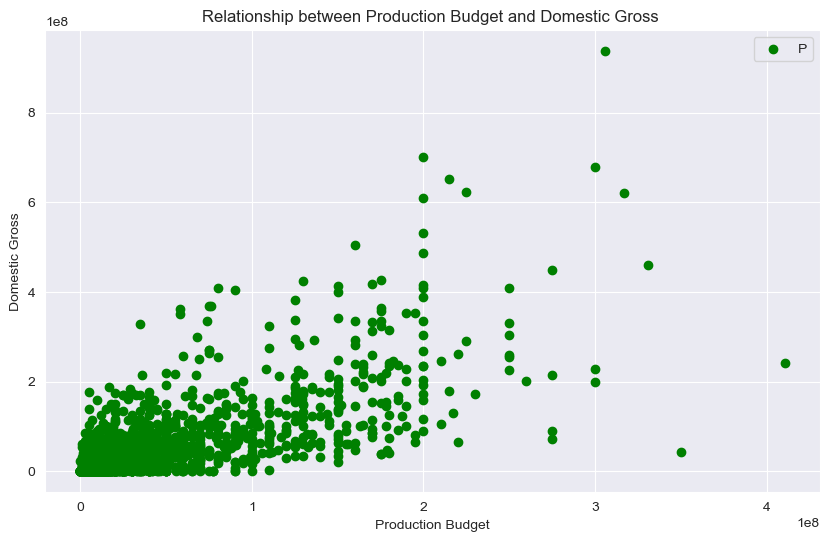

In [366]:
# A scatter plot showing the relationship between production budget and domestic gross
scatter_budget_and_earnings, ax = plt.subplots(figsize=(10,6))

# Plot with scatter()
ax.scatter(x = budget_and_earnings['production_budget'], y = budget_and_earnings['domestic_gross'], color = 'g' )

plt.title('Relationship between Production Budget and Domestic Gross ')
# Legend
plt.legend('Production Budget')
# Labels
plt.xlabel('Production Budget')
plt.ylabel('Domestic Gross');

In [367]:
# We can calculate the Correlation coefficient to make a solid conclusion
# From the scatter plot and the coefficient
np.corrcoef(x = budget_and_earnings['production_budget'],
           y = budget_and_earnings['domestic_gross'])

array([[1.        , 0.73482153],
       [0.73482153, 1.        ]])

In [368]:
# Compare the relationship with Worldwide Gross
np.corrcoef(x = budget_and_earnings['production_budget'],
           y = budget_and_earnings['worldwide_gross'])

array([[1.        , 0.79646255],
       [0.79646255, 1.        ]])

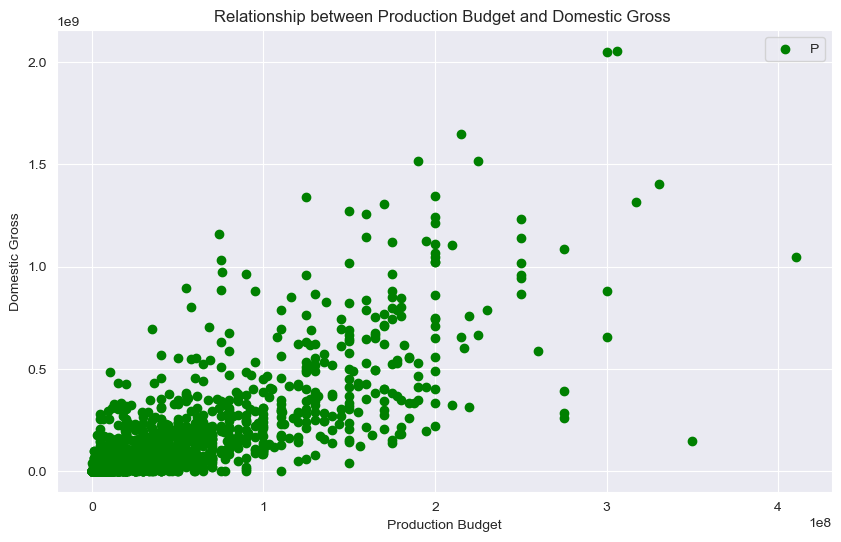

In [369]:
# Make the same plot, but for worldwide gross
scatter_budget_and_earnings, ax = plt.subplots(figsize=(10,6))

# Plot with scatter()
ax.scatter(x = budget_and_earnings['production_budget'], y = budget_and_earnings['worldwide_gross'], color = 'g' )

plt.title('Relationship between Production Budget and Domestic Gross ')
# Legend
plt.legend('Production Budget')
# Labels
plt.xlabel('Production Budget')
plt.ylabel('Domestic Gross');

## Further Evaluation: Which films have the highest Return on Investment
**This refers to the profits which we will present in percentage form**

In [370]:
budget_and_earnings['film_roi'] = ((budget_and_earnings['worldwide_gross'] - budget_and_earnings['production_budget'])/budget_and_earnings['production_budget'])*100
budget_and_earnings


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,film_roi
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,154.667286
2,3,2019-06-07,Dark Phoenix,350000000,42762350,1.497624e+08,-57.210757
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1.403014e+09,324.384139
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1.316722e+09,315.369636
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2.053311e+09,571.016739
...,...,...,...,...,...,...,...
5761,62,2014-12-31,Stories of Our Lives,15000,0,0.000000e+00,-100.000000
5771,72,2015-05-19,Family Motocross,10000,0,0.000000e+00,-100.000000
5772,73,2012-01-13,Newlyweds,9000,4584,4.584000e+03,-49.066667
5777,78,2018-12-31,Red 11,7000,0,0.000000e+00,-100.000000


In [371]:
# Sort films by highest ROI
sorted_ROI = budget_and_earnings.sort_values(ascending = False, by = 'film_roi')
sorted_ROI.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,film_roi
5679,80,2015-07-10,The Gallows,100000,22764410,41656474.0,41556.474000
5211,12,2012-01-06,The Devil Inside,1000000,53262945,101759490.0,10075.949000
5062,63,2011-04-01,Insidious,1500000,54009150,99870886.0,6558.059067
5213,14,2015-04-17,Unfriended,1000000,32789645,64364198.0,6336.419800
4664,65,2010-10-20,Paranormal Activity 2,3000000,84752907,177512032.0,5817.067733
4249,50,2017-01-20,Split,5000000,138141585,278964806.0,5479.296120
5189,90,2014-03-21,Godâs Not Dead,1150000,60755732,63777092.0,5445.834087
4248,49,2017-02-24,Get Out,5000000,176040665,255367951.0,5007.359020
3517,18,2012-05-25,Les Intouchables,10800000,13182281,484873045.0,4389.565231
5063,64,2016-10-21,Moonlight,1500000,27854931,65245512.0,4249.700800


c:\Users\rosew\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\rosew\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\rosew\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\Users\rosew\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, flags=flags)


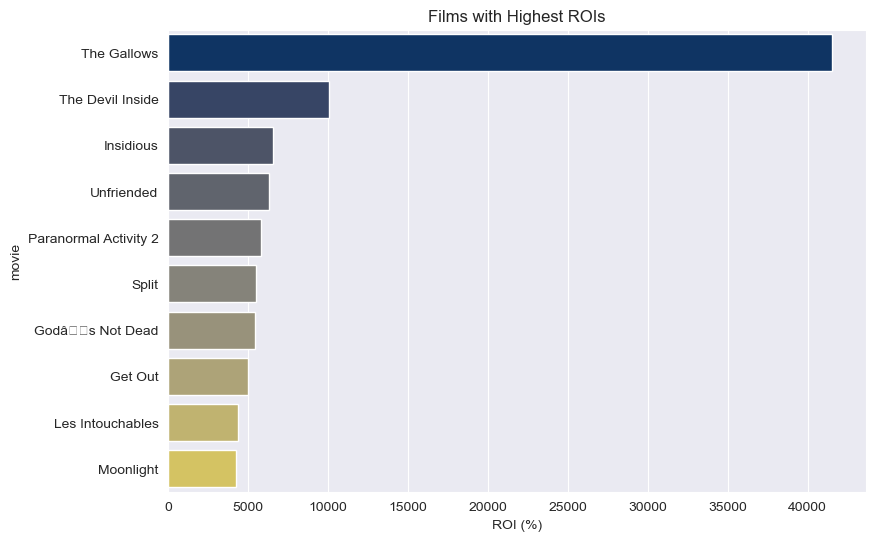

In [372]:
# Plot the top 20 films with highest ROIs
f, ax = plt.subplots(figsize = (9, 6))
top_rois_plot = sns.barplot(data = sorted_ROI.head(10),
                            x = 'film_roi',
                            y = 'movie',
                            palette = 'cividis')

top_rois_plot.set_title('Films with Highest ROIs')
top_rois_plot.set_xlabel('ROI (%)')
top_rois_plot;

# Question 2 Conclusion
**Which films made the most money?**

To get to a conclusion, we looked at the tn_movie_budgets dataset and narrowed our analysis to films releases from 2010 to 2019, in line with the analysis done in question one. <br>

The key question was whether there was a relationship between the movie's production budget and its gross earnings.<br>

Using Seaborn replots it was easy to see the relationship<br>

>In the Production Budget and Domestic Gross Plot, as the production budget increases, so does the domestic gross. Most of the movies with budgets of less than 100 million dollars do not make more tham 500 million dollars. Movies that made more tham 600 million dollars had production budgets of over 200 million. Also, the correlation coeeficient between the production budget and domestic gross is very strong strong (0.73).<br>
>
>In the Production Budget and Worldwide Gross plot we can see a similar trend. The correlation coefficient between the two variables was very strong (0.8).<br>

>>The conclusion is that there is a very strong relationship between production budget and gross earnings.<br>

We further investigated the ROI. By calculating the ROI using worldwide gross, we saw that many movies had negative returns.<br>

However, there were many movies that made 50x or even 400x their production budget. Looking at the top 20 movies with the highest ROIs, we can see that most of these are horror films.<br>

**RECOMMENDATIONS**

Based on these findings, this is the question to ask ourselves:
* How big is our production budget?
We can merge our answer with that of question one.<br>

The conclusion is that is we have a lot of money to invest, we can choose a sci-fi/fantasy/superhero franchise film, use a large production budget, and make more gross earnings.<br>

With a small budget, we can choose a hooror film and get a large ROI.<br>



#  When should the films be released?
**Which release months make the most money?**

In [373]:
# We will use the budge and earnings table and compare release month to worldwide and domestic gross
budget_and_earnings.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,film_roi
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,154.667286
2,3,2019-06-07,Dark Phoenix,350000000,42762350,1.497624e+08,-57.210757
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1.403014e+09,324.384139
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1.316722e+09,315.369636
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2.053311e+09,571.016739
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2.048134e+09,582.711400
8,9,2017-11-17,Justice League,300000000,229024295,6.559452e+08,118.648403
9,10,2015-11-06,Spectre,300000000,200074175,8.796209e+08,193.206974
10,11,2012-07-20,The Dark Knight Rises,275000000,448139099,1.084439e+09,294.341491
11,12,2018-05-25,Solo: A Star Wars Story,275000000,213767512,3.931513e+08,42.964126


In [374]:
# We had cleaned the table, but let's check whether there are null values
budget_and_earnings.isna().sum()
# There are no null values

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
film_roi             0
dtype: int64

In [375]:
# Checking whether there are duplicates
budget_and_earnings_duplicates = budget_and_earnings[budget_and_earnings.duplicated()]
print(len(mb_duplicates))
# There are no duplicates

0


In [376]:
# Our columns of interest are release date (month)
# We can isolate these by dropping the columns we don't need for better readability
# Dropping the production budget column
movie_releases = budget_and_earnings.drop('production_budget', axis = 1)
# Dropping the movie title column
movie_releases = movie_releases.drop('movie', axis = 1)
# Dropping the film roi column
movie_releases = movie_releases.drop('film_roi', axis = 1)
movie_releases.head()


,id,release_date,domestic_gross,worldwide_gross
1,2,2011-05-20,241063875,1.045664e+09
2,3,2019-06-07,42762350,1.497624e+08
3,4,2015-05-01,459005868,1.403014e+09
4,5,2017-12-15,620181382,1.316722e+09
5,6,2015-12-18,936662225,2.053311e+09


In [377]:
# Quick preview of release dates with highest worldwide gross 
movie_releases.groupby('release_date')['worldwide_gross'].sum().sort_values(ascending = False)

release_date
2015-12-18    2.418556e+09
2013-11-22    2.306838e+09
2018-04-27    2.048134e+09
2018-12-21    1.688254e+09
2012-05-04    1.664107e+09
                  ...     
2015-01-01    0.000000e+00
2011-05-10    0.000000e+00
2015-11-10    0.000000e+00
2010-10-05    0.000000e+00
2019-11-22    0.000000e+00
Name: worldwide_gross, Length: 726, dtype: float64

In [378]:
# Quick preview of release dates with highest domestic gross 
movie_releases.groupby('release_date')['domestic_gross'].sum().sort_values(ascending = False)

release_date
2015-12-18    1111370900
2013-11-22     893775852
2018-02-16     708327110
2017-12-15     704591762
2018-04-27     678815482
                 ...    
2015-03-17             0
2011-06-28             0
2015-03-24             0
2011-06-21             0
2019-11-22             0
Name: domestic_gross, Length: 726, dtype: int32

In [379]:
# Create column indicating day of the week of release
movie_releases['day'] = movie_releases['release_date'].dt.day_name()

In [380]:
# Create column indicating month of release
movie_releases['month'] = movie_releases['release_date'].dt.month

In [381]:
movie_releases.sort_values(by = 'worldwide_gross', ascending = False).head(15)

,id,release_date,domestic_gross,worldwide_gross,day,month
5,6,2015-12-18,936662225,2.053311e+09,Friday,12
6,7,2018-04-27,678815482,2.048134e+09,Friday,4
33,34,2015-06-12,652270625,1.648855e+09,Friday,6
66,67,2015-04-03,353007020,1.518723e+09,Friday,4
26,27,2012-05-04,623279547,1.517936e+09,Friday,5
3,4,2015-05-01,459005868,1.403014e+09,Friday,5
41,42,2018-02-16,700059566,1.348258e+09,Friday,2
260,61,2011-07-15,381193157,1.341693e+09,Friday,7
4,5,2017-12-15,620181382,1.316722e+09,Friday,12
112,13,2018-06-22,417719760,1.305773e+09,Friday,6


**Visualization**

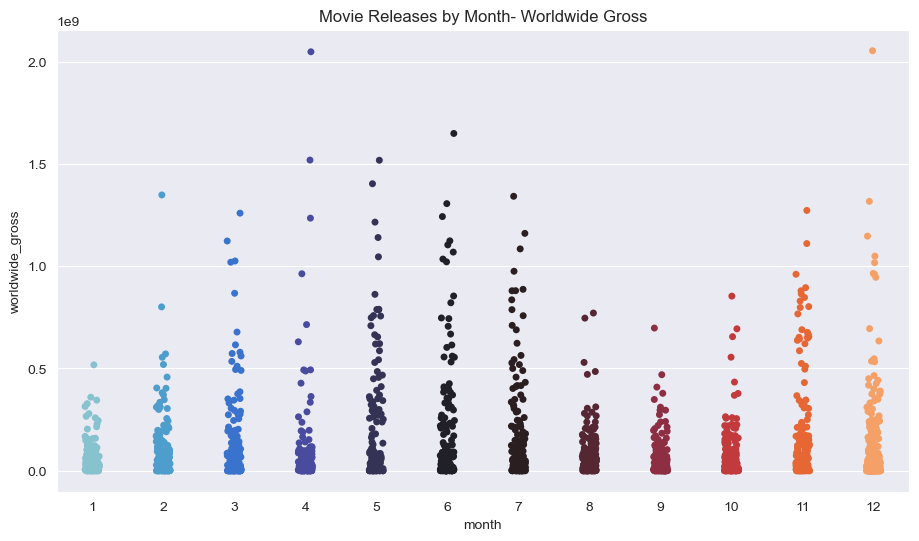

In [382]:
# Plot to see the movies that were released at different months- Worldwide Gross

f, ax = plt.subplots(figsize = (11, 6))
movies = sns.stripplot(data = movie_releases,
                   x = "month",
                   y = "worldwide_gross", 
                    palette = 'icefire')
movies.set_title('Movie Releases by Month- Worldwide Gross');

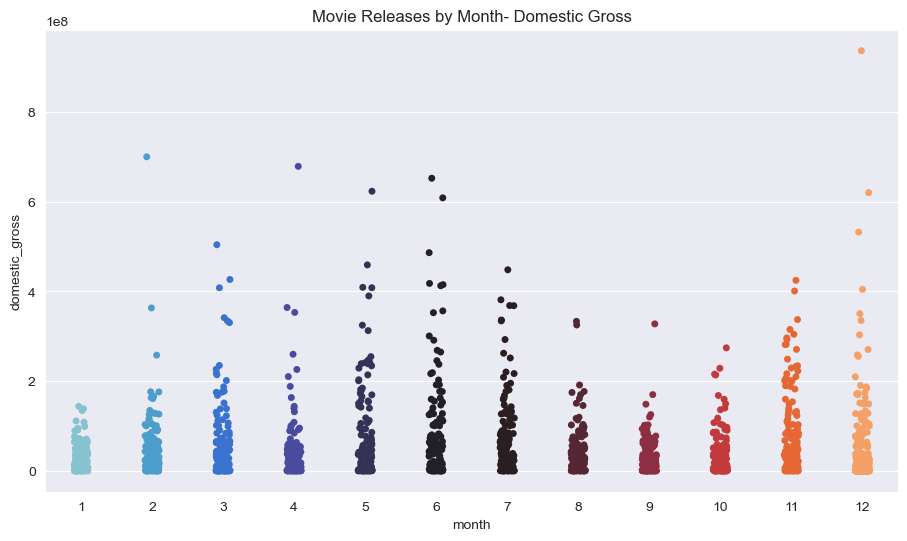

In [383]:
# Plot to see the movies that were released at different months- Domestic Gross

f, ax = plt.subplots(figsize = (11, 6))
movies = sns.stripplot(data = movie_releases,
                   x = "month",
                   y = "domestic_gross", 
                    palette = 'icefire')
movies.set_title('Movie Releases by Month- Domestic Gross');

''

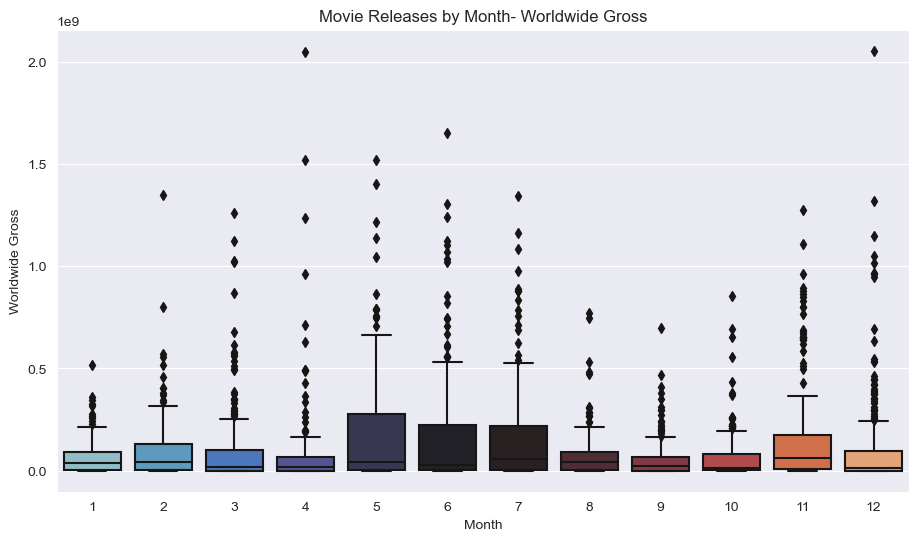

In [384]:
# Let's use a box for another similar visualization- Worldwide Gross
f, ax = plt.subplots(figsize = (11, 6))
movies2 = sns.boxplot(data = movie_releases,
                   x = "month",
                   y = "worldwide_gross", 
                    palette = 'icefire')
movies2.set_title('Movie Releases by Month- Worldwide Gross')
movies2.set_ylabel('Worldwide Gross')
movies2.set_xlabel('Month')
;

''

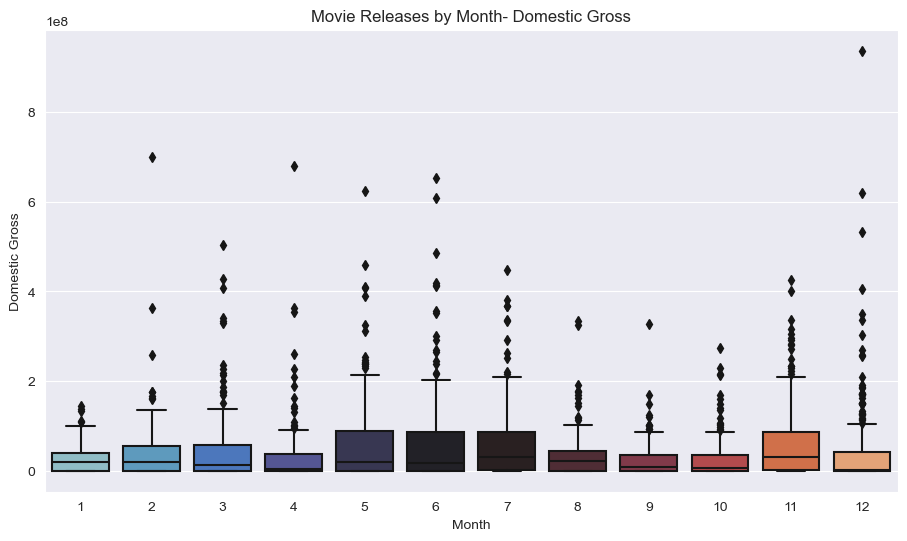

In [385]:
# Let's use a box for another similar visualization- Domestic Gross
f, ax = plt.subplots(figsize = (11, 6))
movies2 = sns.boxplot(data = movie_releases,
                   x = "month",
                   y = "domestic_gross", 
                    palette = 'icefire')
movies2.set_title('Movie Releases by Month- Domestic Gross')
movies2.set_ylabel('Domestic Gross')
movies2.set_xlabel('Month')
;

In [386]:
# Group movie releases by month and find mean and median worldwide gross for each month
movie_releases_by_month = movie_releases.groupby('month')['worldwide_gross'].agg(['mean', 'median'])

In [387]:
# Group movie releases by month and find mean and median domestic gross for each month
movie_releases_by_month_domestic = movie_releases.groupby('month')['domestic_gross'].agg(['mean', 'median'])

In [388]:
# Sort by median, since that number is less affected by outliers- Worldwide Gross
movie_releases_by_month.sort_values(by = 'median', ascending = False)

,mean,median
month,,
11,1.726833e+08,60217171.0
7,1.735722e+08,57273049.0
2,9.961363e+07,43528634.0
5,1.864977e+08,43061376.0
8,7.585777e+07,40650842.0
1,6.586246e+07,36285960.5
6,1.774432e+08,29867459.5
9,5.853239e+07,22281732.0
3,1.082374e+08,20592763.0


In [389]:
# Sort by median, since that number is less affected by outliers- Domestic Gross
movie_releases_by_month_domestic.sort_values(by = 'median', ascending = False)

,mean,median
month,,
7,6.357822e+07,31206263.0
11,6.460815e+07,30659817.0
8,3.471135e+07,21295021.0
5,6.749728e+07,20316694.0
2,4.177002e+07,19452138.0
1,2.647812e+07,18504178.5
6,6.982529e+07,16847261.0
3,4.536472e+07,12490404.5
9,2.479126e+07,8005586.0


# Question 3 Conclusion

To answer this question, the tn_movie_budgets database provided movie release dates and gross worldwide and domestic earnings.<br>

Looking at the domestic gross by month over 10 years (2010 - 2019), we can find the months with the highest domestic gross.<br>

Using these ten years gives data with ten occurences for each month.<br>

The median was used as an indicator to rule out outliers.<br>

The five highest grossing months based on domestic returns are:<br>

* July - $31,206,263

* November - $30,659,817

* August - $21,295,021

* April - $20,316,694

* February - $19,452,138

The five highest grossing months based on worldwide returns are:<br>

* November - $60,217,171

* July - $57,273,049

* February- $43,528,634

* January - $43,061,376

* August - $40,650,842

**RECOMMENDATIONS**

Based on these findings, the common months are July, November, August, and February. This is also evidenced from the bar and strip plots where the figures for these months are larger than the rest.<br>


In [390]:
# Selecting the genres column
genres = """
SELECT genres
FROM movie_basics
;
"""
pd.read_sql(genres, conn)

,genres
0,"Action,Crime,Drama"
1,"Biography,Drama"
2,Drama
3,"Comedy,Drama"
4,"Comedy,Drama,Fantasy"
...,...
146139,Drama
146140,Documentary
146141,Comedy
146142,None


In [391]:
# Checking for null values in the genre column
null_in_genres = """
SELECT *
FROM movie_basics
WHERE genres IS NULL
;
"""
pd.read_sql(null_in_genres, conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0187902,How Huang Fei-hong Rescued the Orphan from the...,How Huang Fei-hong Rescued the Orphan from the...,2011,NaN,None
1,tt0253093,Gangavataran,Gangavataran,2018,134.0,None
2,tt0306058,Second Coming,Second Coming,2012,95.0,None
3,tt0326592,The Overnight,The Overnight,2010,88.0,None
4,tt0330811,Regret Not Speaking,Regret Not Speaking,2011,NaN,None
...,...,...,...,...,...,...
5403,tt9907396,Footloose in the Cotswolds - Part 1,Footloose in the Cotswolds - Part 1,2016,118.0,None
5404,tt9907608,Footloose in the Cotswolds - Part 2,Footloose in the Cotswolds - Part 2,2016,102.0,None
5405,tt9910922,Doctor Who Augmented Reality: Times Magazine,Doctor Who Augmented Reality: Times Magazine,2013,NaN,None
5406,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None


In [392]:
# Checking for the percentage of null genre values to see whether its siginifcant for dropping purposes
# From the queries above, 5,408 rows do not have genres while the total df has 146,144 rows
percentage_of_null_genres = (5408/146144)*100
percentage_of_null_genres
# 3.7% is insignificant and we can drop these

3.7004598204510617

In [393]:
sql_query = pd.read_sql_query(
    """
    SELECT movie_id, genres
    FROM movie_basics
    """,
    conn,
)

df = pd.DataFrame(sql_query, columns=["movie_id", "genres"])

print(df)

         movie_id                genres
0       tt0063540    Action,Crime,Drama
1       tt0066787       Biography,Drama
2       tt0069049                 Drama
3       tt0069204          Comedy,Drama
4       tt0100275  Comedy,Drama,Fantasy
...           ...                   ...
146139  tt9916538                 Drama
146140  tt9916622           Documentary
146141  tt9916706                Comedy
146142  tt9916730                  None
146143  tt9916754           Documentary

[146144 rows x 2 columns]


In [394]:
df.isna().sum()

movie_id       0
genres      5408
dtype: int64